# Import and installation

In [1]:
import cv2

In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 7287, done.
remote: Counting objects: 100% (409/409), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 7287 (delta 256), reused 265 (delta 146), pack-reused 6878
Receiving objects: 100% (7287/7287), 9.21 MiB | 23.53 MiB/s, done.
Resolving deltas: 100% (4983/4983), done.
/content/yolov5
     |████████████████████████████████| 645kB 8.0MB/s 


In [3]:
%cd ..

/content


In [3]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

Selecting previously unselected package libgflags2.2.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

#Code

In [13]:
def splitter(input_path, output_path, full=True, frames=300):
    vidcap = cv2.VideoCapture(input_path)
    success,image = vidcap.read()
    count = 0
    if full:
        while success:
            cv2.imwrite(output_path + "%d.jpg" % count, image)    
            success,image = vidcap.read()
            print(output_path + "%d.jpg" % count, success)
            count += 1
    else:
        while count <= frames:
            cv2.imwrite(output_path + "%d.jpg" % count, image)    
            success,image = vidcap.read()
            print(output_path + "%d.jpg" % count, success)
            count += 1

In [12]:
!mkdir /content/split_dir/

In [17]:
splitter("/content/Phoning.mp4", "/content/split_dir/", full=False)

/content/split_dir/0.jpg True
/content/split_dir/1.jpg True
/content/split_dir/2.jpg True
/content/split_dir/3.jpg True
/content/split_dir/4.jpg True
/content/split_dir/5.jpg True
/content/split_dir/6.jpg True
/content/split_dir/7.jpg True
/content/split_dir/8.jpg True
/content/split_dir/9.jpg True
/content/split_dir/10.jpg True
/content/split_dir/11.jpg True
/content/split_dir/12.jpg True
/content/split_dir/13.jpg True
/content/split_dir/14.jpg True
/content/split_dir/15.jpg True
/content/split_dir/16.jpg True
/content/split_dir/17.jpg True
/content/split_dir/18.jpg True
/content/split_dir/19.jpg True
/content/split_dir/20.jpg True
/content/split_dir/21.jpg True
/content/split_dir/22.jpg True
/content/split_dir/23.jpg True
/content/split_dir/24.jpg True
/content/split_dir/25.jpg True
/content/split_dir/26.jpg True
/content/split_dir/27.jpg True
/content/split_dir/28.jpg True
/content/split_dir/29.jpg True
/content/split_dir/30.jpg True
/content/split_dir/31.jpg True
/content/split_dir

In [18]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.6 --save-txt --source "/content/split_dir/" --hide-labels --hide-conf --classes 0

detect: weights=['yolov5s.pt'], source=/content/split_dir/, imgsz=640, conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=[0], agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False
YOLOv5 🚀 v5.0-226-g6306091 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/301 /content/split_dir/0.jpg: 640x640 1 person, Done. (0.0

In [19]:
!cd openpose && ./build/examples/openpose/openpose.bin --image_dir "/content/yolov5/runs/detect/exp3" --write_json ./output/ --display 0  --write_images .../openpose_images

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 530.145496 seconds.


In [4]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp37-none-any.whl size=6084 sha256=3847a66ba904964db09fdceca70c8c261b076169f8112ddbce0de2f0cd06e43e
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [12]:
!ffmpeg -i /content/VideoPose3D/inference/input_directory/Phoning.mp4 -ss 0:00 -to 0:10 -c copy /content/VideoPose3D/inference/input_directory/output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [5]:
!git clone https://github.com/facebookresearch/VideoPose3D.git

Cloning into 'VideoPose3D'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 9.53 MiB | 33.53 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [6]:
!git clone https://github.com/facebookresearch/detectron2.git
!python -m pip install -e detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 12412, done.
remote: Counting objects: 100% (319/319), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 12412 (delta 173), reused 288 (delta 158), pack-reused 12093
Receiving objects: 100% (12412/12412), 4.93 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (9016/9016), done.
Obtaining file:///content/detectron2
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
     |████████████████████████████████| 153kB 41.6MB/s 
     |████████████████████████████████| 133kB 55.8MB/s 
     |████████████████████████████████| 112kB 58.9MB/s 
     |████████████████████████████████| 747kB 47.6MB/s 
     |████████████████████████████████| 727kB 29.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210617-cp37-none-any.whl size=60462 sha256=c8c313358f1d0cb027db4dae6f0643aefc116b043ffced7dfbaf74fe29f2bf3a
  Stored in directory: /root/.cache/pip/wheels/8c/ec/c

In [8]:
%cd VideoPose3D/

/content/VideoPose3D


In [13]:
%cd inference
!python infer_video_d2.py \
    --cfg COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml \
    --output-dir output_directory \
    --image-ext mp4 \
    input_directory

[Errno 2] No such file or directory: 'inference'
/content/VideoPose3D/inference
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
Processing input_directory/output.mp4
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --ena

In [14]:
%cd ..
%cd data
!python prepare_data_2d_custom.py -i /content/VideoPose3D/inference/output_directory -o myvideos

/content/VideoPose3D
/content/VideoPose3D/data
Parsing 2D detections from /content/VideoPose3D/inference/output_directory
Processing /content/VideoPose3D/inference/output_directory/output.mp4.npz
500 total frames processed
0 frames were interpolated
----------
Saving...
Done.


In [ ]:
# %cd ..

In [19]:
!python run.py -d custom -k myvideos -arc 3,3,3,3,3 -c checkpoint --evaluate pretrained_h36m_detectron_coco.bin --render --viz-subject output.mp4 --viz-action custom --viz-camera 0 --viz-video /content/VideoPose3D/inference/input_directory/output.mp4 --viz-output output_video.mp4 --viz-size 6 --viz-export output_coordinates

Namespace(actions='*', architecture='3,3,3,3,3', batch_size=1024, bone_length_term=True, by_subject=False, causal=False, channels=1024, checkpoint='checkpoint', checkpoint_frequency=10, data_augmentation=True, dataset='custom', dense=False, disable_optimizations=False, downsample=1, dropout=0.25, epochs=60, evaluate='pretrained_h36m_detectron_coco.bin', export_training_curves=False, keypoints='myvideos', learning_rate=0.001, linear_projection=False, lr_decay=0.95, no_eval=False, no_proj=False, render=True, resume='', stride=1, subjects_test='S9,S11', subjects_train='S1,S5,S6,S7,S8', subjects_unlabeled='', subset=1, test_time_augmentation=True, viz_action='custom', viz_bitrate=3000, viz_camera=0, viz_downsample=1, viz_export='output_coordinates', viz_limit=-1, viz_no_ground_truth=False, viz_output='output_video.mp4', viz_size=6, viz_skip=0, viz_subject='output.mp4', viz_video='/content/VideoPose3D/inference/input_directory/output.mp4', warmup=1)
Loading dataset...
Preparing data...
Load

#Visualise results

In [32]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json
import matplotlib.image as mpimg
import plotly.graph_objs as go
import plotly

from mpl_toolkits import mplot3d

In [84]:
person_0 = np.load("/content/VideoPose3D/output_coordinates.npy")

In [85]:
x = []
y = []
z = []
labels = []
for i, coordinates in enumerate(person_0[200]):
    x.append(coordinates[0])
    y.append(coordinates[1])
    z.append(coordinates[2])
    labels.append(i)

In [86]:
pairs = [(3,2), (2,1), (1,0), (0,4), (4,5), (5, 6), (0, 7), (7,8),(8,9), (9,10),
        (8,11), (11,12), (12,13), (8,14), (14,15), (15,16)]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    text=labels,
    name='keypoints'
)

x_lines = list()
y_lines = list()
z_lines = list()

#create the coordinate list for the lines
for p in pairs:
    for i in range(2):
        x_lines.append(x[p[i]])
        y_lines.append(y[p[i]])
        z_lines.append(z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='limbs'
)

fig = go.Figure(data=[trace1, trace2])
fig.show()

#Testing

In [64]:
from IPython.display import YouTubeVideo

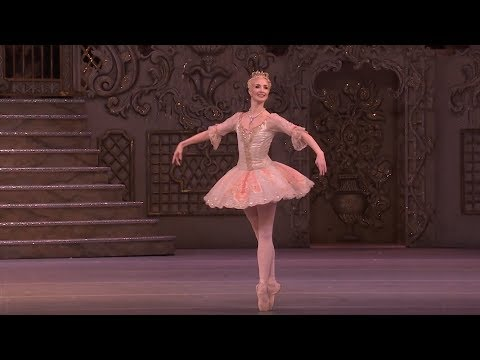

In [65]:
YOUTUBE_ID = 'zV1qLYukTH8'

YouTubeVideo(YOUTUBE_ID)

In [71]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4

[youtube] zV1qLYukTH8: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 38.27MiB in 12:50
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis 

In [75]:
%cd content/

/content


In [76]:
%cd VideoPose3D/
%cd inference
!python infer_video_d2.py \
    --cfg COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml \
    --output-dir output_directory \
    --image-ext mp4 \
    input_directory
%cd ..
%cd data
!python prepare_data_2d_custom.py -i /content/VideoPose3D/inference/output_directory -o myvideos
%cd ..

/content/VideoPose3D
/content/VideoPose3D/inference
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
Processing input_directory/video.mp4
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnap

In [77]:
!python run.py -d custom -k myvideos -arc 3,3,3,3,3 -c checkpoint --evaluate pretrained_h36m_detectron_coco.bin --render --viz-subject video.mp4 --viz-action custom --viz-camera 0 --viz-video /content/VideoPose3D/inference/input_directory/video.mp4 --viz-output output_video_2.mp4 --viz-size 6 --viz-export output_coordinates_2

Namespace(actions='*', architecture='3,3,3,3,3', batch_size=1024, bone_length_term=True, by_subject=False, causal=False, channels=1024, checkpoint='checkpoint', checkpoint_frequency=10, data_augmentation=True, dataset='custom', dense=False, disable_optimizations=False, downsample=1, dropout=0.25, epochs=60, evaluate='pretrained_h36m_detectron_coco.bin', export_training_curves=False, keypoints='myvideos', learning_rate=0.001, linear_projection=False, lr_decay=0.95, no_eval=False, no_proj=False, render=True, resume='', stride=1, subjects_test='S9,S11', subjects_train='S1,S5,S6,S7,S8', subjects_unlabeled='', subset=1, test_time_augmentation=True, viz_action='custom', viz_bitrate=3000, viz_camera=0, viz_downsample=1, viz_export='output_coordinates_2', viz_limit=-1, viz_no_ground_truth=False, viz_output='output_video_2.mp4', viz_size=6, viz_skip=0, viz_subject='video.mp4', viz_video='/content/VideoPose3D/inference/input_directory/video.mp4', warmup=1)
Loading dataset...
Preparing data...
Lo

In [82]:
person_0 = np.load("/content/VideoPose3D/output_coordinates_2.npy")

x = []
y = []
z = []
labels = []
for i, coordinates in enumerate(person_0[len(person_0)-1]):
    x.append(coordinates[0])
    y.append(coordinates[1])
    z.append(coordinates[2])
    labels.append(i)

In [83]:
pairs = [(3,2), (2,1), (1,0), (0,4), (4,5), (5, 6), (0, 7), (7,8),(8,9), (9,10),
        (8,11), (11,12), (12,13), (8,14), (14,15), (15,16)]

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    text=labels,
    name='keypoints'
)

x_lines = list()
y_lines = list()
z_lines = list()

#create the coordinate list for the lines
for p in pairs:
    for i in range(2):
        x_lines.append(x[p[i]])
        y_lines.append(y[p[i]])
        z_lines.append(z[p[i]])
    x_lines.append(None)
    y_lines.append(None)
    z_lines.append(None)

trace2 = go.Scatter3d(
    x=x_lines,
    y=y_lines,
    z=z_lines,
    mode='lines',
    name='limbs'
)

fig = go.Figure(data=[trace1, trace2])
fig.show()